# Task-5: To explore Business Analytics

## Problem Statement: 
Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’. You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

## Importing the required libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns 

## Accessing the dataset and understanding the data

In [2]:
df=pd.read_csv('SampleSuperstore.csv', low_memory=False)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# checking the shape of the dataset

df.shape

(9994, 13)

In [4]:
# checking the datatypes of the dataset

df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
# checking if there is any null values

df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
# describing the data for all the numerical features

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [41]:
# describing the data for all the features

df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Visualizing the data

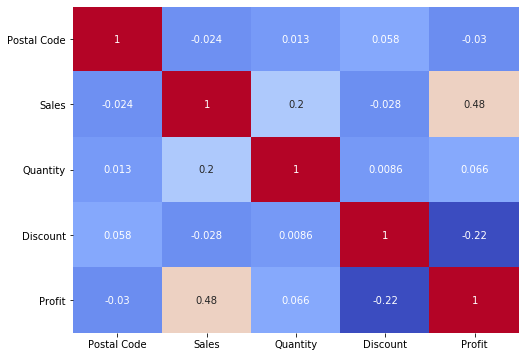

In [10]:
# plotting the correlation among the features (including Postal Code)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, cbar=False)
ax.set_ylim([5,0])
ax.set_xlim([0,5])
ax.set_yticklabels(ax.get_xticklabels(), rotation=0);

In [12]:
# dropping the column Postal code as it doesnot have any significance in the correlation plot

sample=df.drop('Postal Code',axis=1)
sample.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


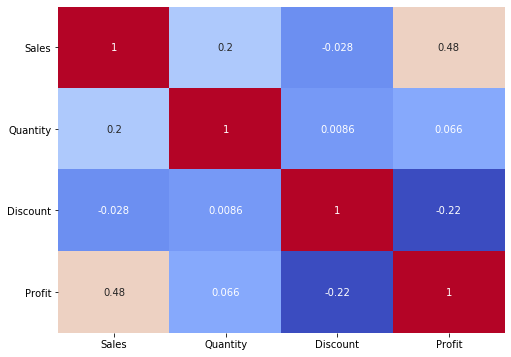

In [14]:
# plotting the correlation among the features (excluding Postal Code)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(sample.corr(), cmap='coolwarm', annot=True, cbar=False)
ax.set_ylim([4,0])
ax.set_xlim([0,4])
ax.set_yticklabels(ax.get_xticklabels(), rotation=0);

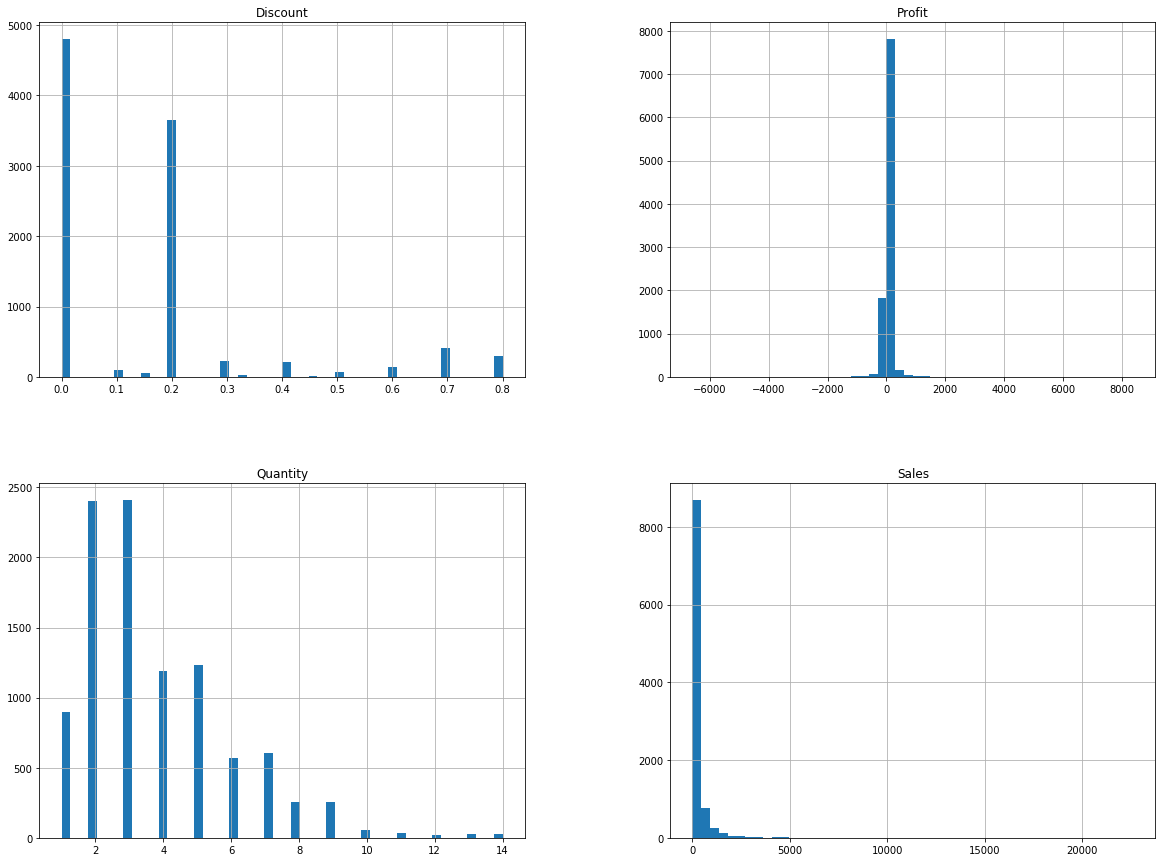

In [24]:
sample.hist(bins=50 ,figsize=(20,15))
plt.show();

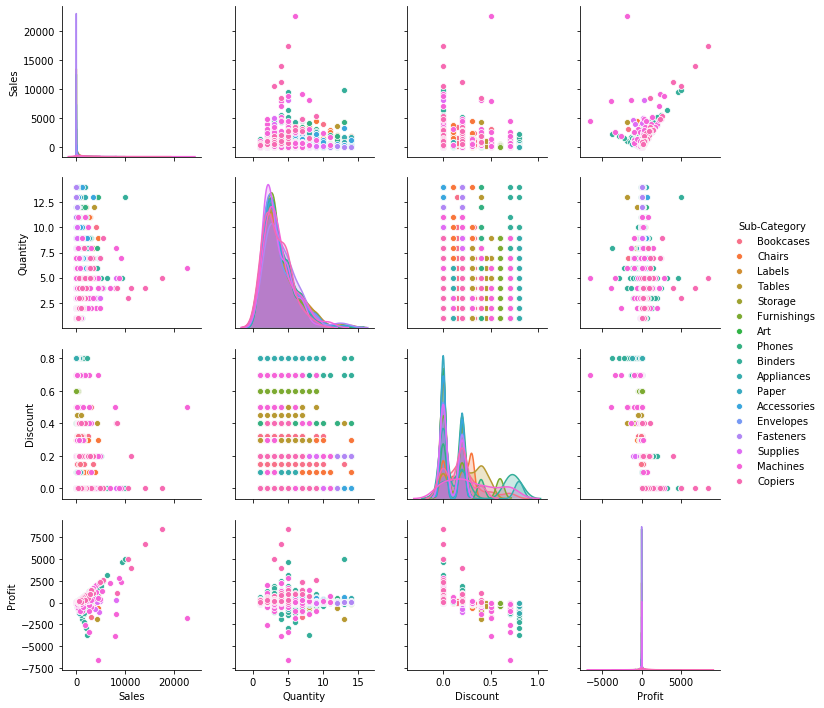

In [25]:
figsize=(15,10)
sns.pairplot(sample,hue='Sub-Category')

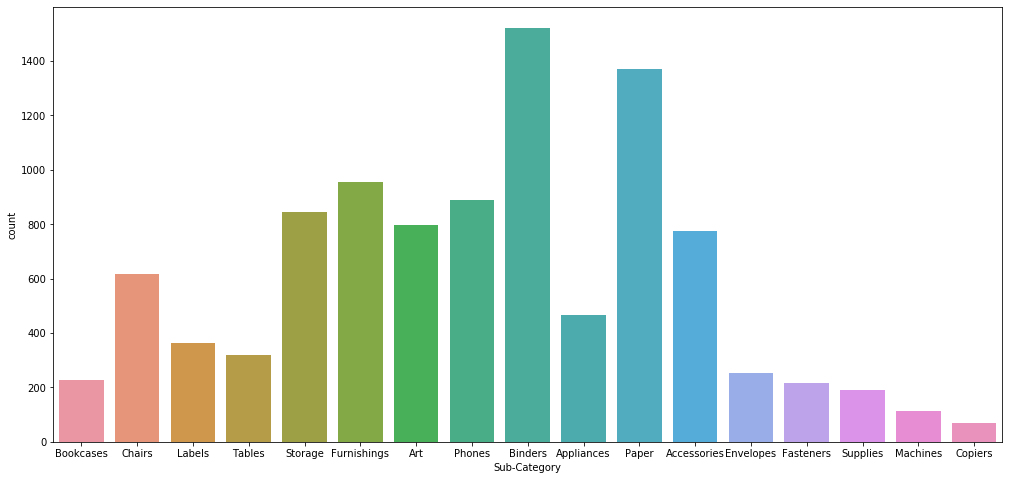

In [26]:
plt.figure(figsize=(17,8))
sns.countplot(x="Sub-Category",data=df)
plt.show()

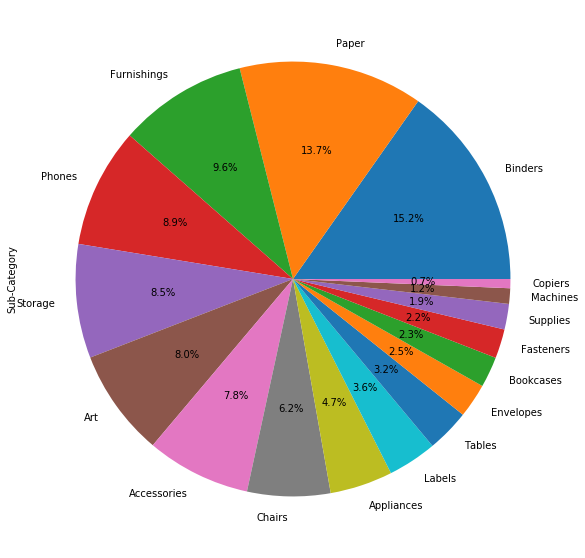

In [27]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

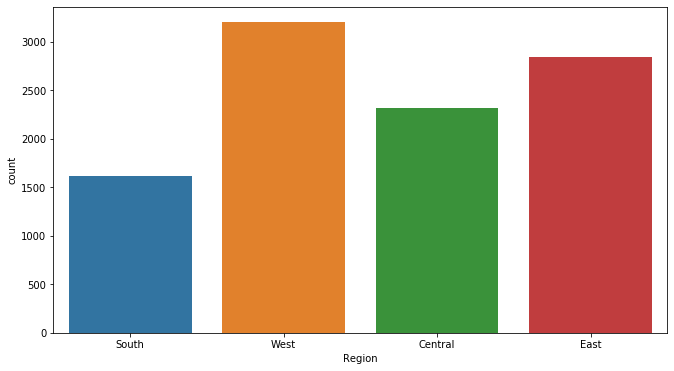

In [66]:
plt.figure(figsize=(11,6))
sns.countplot(x="Region", data=df)
plt.show()

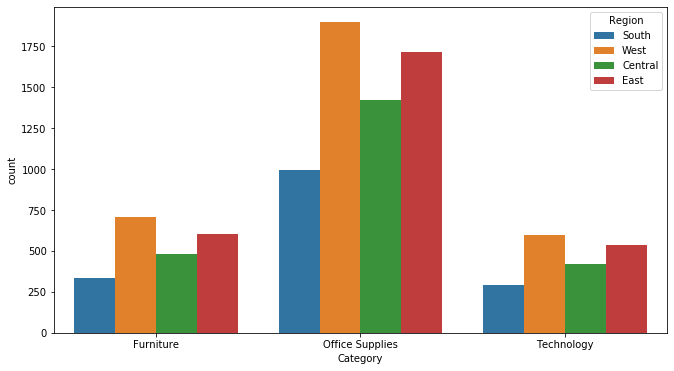

In [31]:
plt.figure(figsize=(11,6))
sns.countplot(x="Category", hue="Region", data=df)
plt.show()

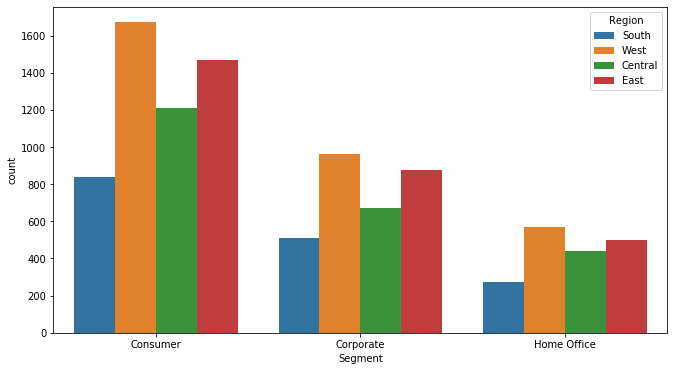

In [49]:
plt.figure(figsize=(11,6))
sns.countplot(x="Segment", hue="Region", data=df)
plt.show()

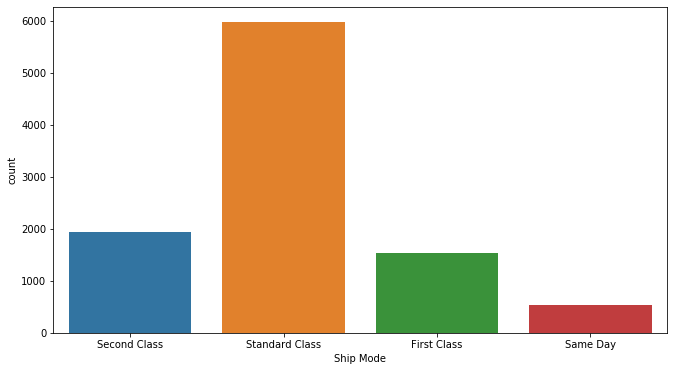

In [58]:
plt.figure(figsize=(11,6))
sns.countplot(x="Ship Mode",data=df)
plt.show()

In [67]:
# displaying the states with the profits, with profits in descending order

data=df.groupby(['State']).Profit.mean().reset_index()
data.sort_values('Profit', ascending=False)

,State,Profit
43,Vermont,204.088936
37,Rhode Island,130.100523
12,Indiana,123.375411
24,Montana,122.221900
21,Minnesota,121.608847
7,District of Columbia,105.958930
6,Delaware,103.930988
48,Wyoming,100.196000
23,Missouri,97.518341
20,Michigan,95.934069


In [57]:
# displaying all the aggregation functions of the profit grouped by the state

df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


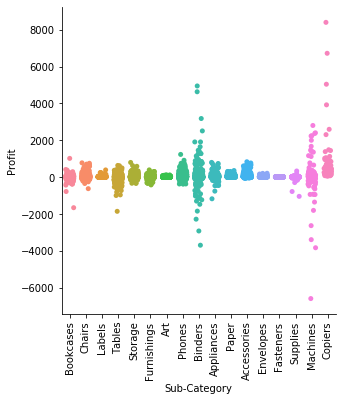

In [48]:
g = sns.catplot(x='Sub-Category',y='Profit',data=df,jitter=0.25)
g.set_xticklabels(rotation=90)

Text(0.5, 0.98, 'Pie Consumption Patterns in the United States')

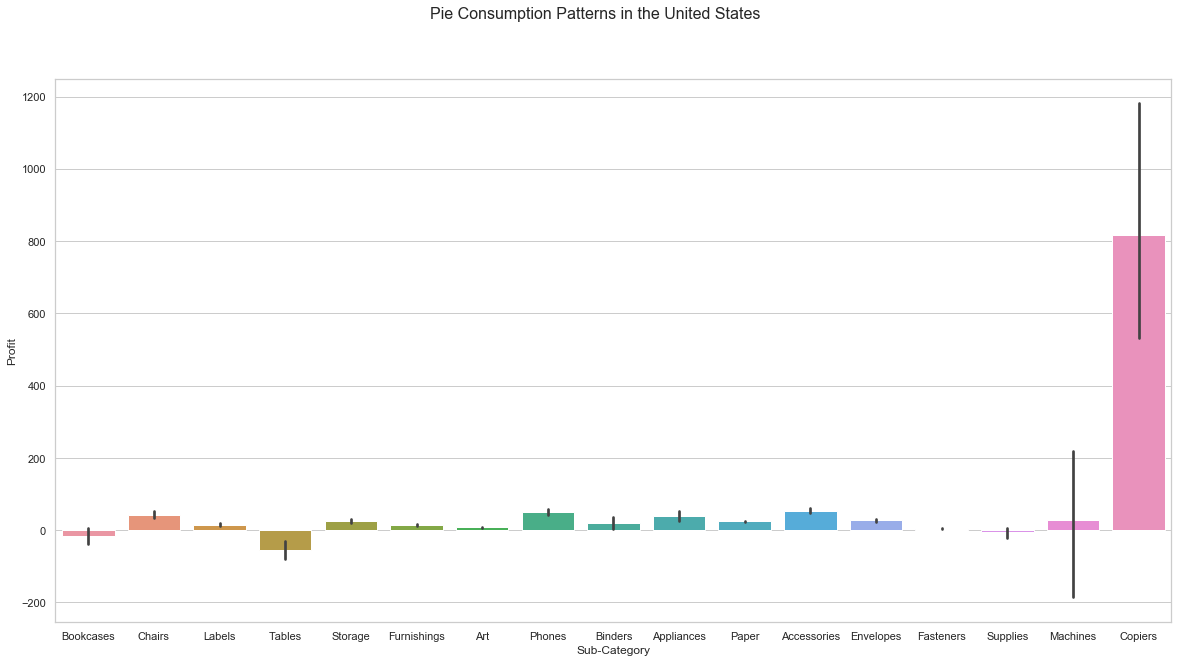

In [71]:
plt.figure(2, figsize=(20,10))

sns.barplot(x='Sub-Category',y='Profit', data=df)

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)

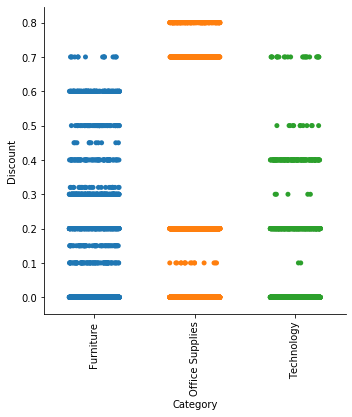

In [59]:
g1 = sns.catplot(x='Category',y='Discount',data=df,jitter=0.25)
g1.set_xticklabels(rotation=90)

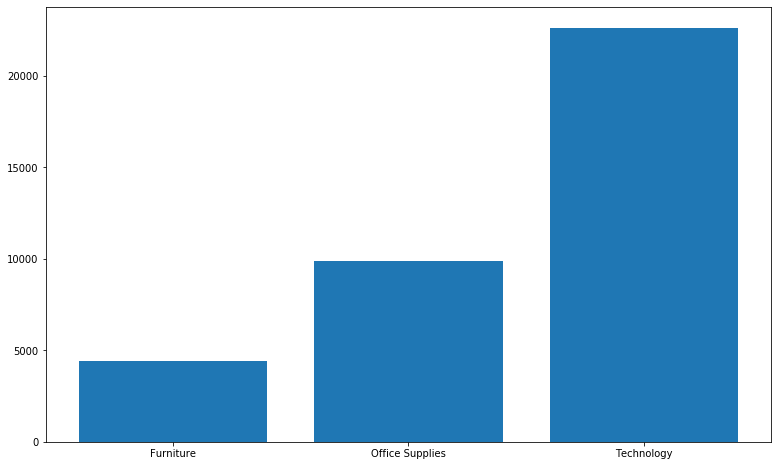

In [52]:
plt.figure(figsize=(13,8))
plt.bar('Category','Sales',data=df)
plt.show()

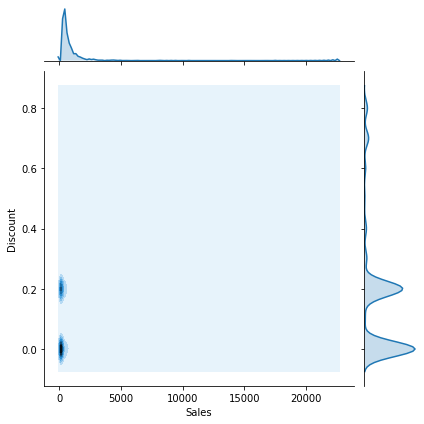

In [56]:
sns.jointplot(x='Sales',y='Discount',data=df,kind='kde')

## Conclusion


We can see that in which states and in which Category, sales and profits are high or low. We can improve profit in some states by providing relevant discounts so that company and cosumer both will be in profit.

'Standard Class' accounts for the majority of profit .

'Tables', 'Chairs', 'Bookcase', 'Appliances' and 'Supplier' have noticeably less profit .

'Furniture' has noticeably more discount.

'West' and 'East' have noticeably more profit because the bars in those regions are higher for all the categories.

'Florida', 'Oregon', 'Arizona', 'Illinois', 'Texas', 'Pennsylvania', 'Tennessee', 'North Carlina', 'Colorado' and 'Ohio' have noticeably less Profit.

'Vermont', 'Rhode Island', 'Indiana', 'Montana', 'Minnesota', 'District of Columbia', 'Delaware' and 'Wyoming' have noticeably high Profit.

The highest level of sales is for Technology

'Binders' sub-category has the highest amount of profit and loss both. While 'copiers' sub-category has the highest amount of profit with no loss.